### 4. Plot the Climatology

### Loading the data

In [1]:
import pandas as pd
from smadi.data_reader import read_grid_point

# Set display options
pd.set_option("display.max_columns", 8)  # Limit the number of columns displayed
pd.set_option("display.precision", 2)  # Set precision to 2 decimal places

# Define the path to the ASCAT data
data_path = "/home/m294/ascat_dataset"

# Example: A grid point in Morocco
lon = -7.382
lat = 33.348
gpid = 3611180

# Define the location of the observation point
loc = (lon, lat)  

# Extract ASCAT soil moisture time series for the given location
data = read_grid_point(loc=loc, ascat_sm_path=data_path, read_bulk=False , era5_land_path=None) #Provide the path to the ERA5-Land data if you want mask snow 
                                                                                                # and frozen soil conditions. For more information about
                                                                                                # the dataset see ERA5-Land data documentation and to download 
                                                                                                # use the CDS API or https://ecmwf-models.readthedocs.io/en/latest/

# Get the ASCAT soil moisture time series
ascat_ts = data.get("ascat_ts")


# Display the first few rows of the time series data
ascat_ts.head()

Reading ASCAT soil moisture: /home/m294/ascat_dataset
ASCAT GPI: 3611180 - distance:   23.713 m


,sm,sm_noise,as_des_pass,ssf,...,sigma40,sigma40_noise,num_sigma,sm_valid
2007-01-01 21:02:04.161,34.86,3.24,0,0,...,-12.27,0.19,3,True
2007-01-02 11:03:22.807,23.16,3.27,1,0,...,-13.05,0.19,3,True
2007-01-03 10:42:47.739,33.05,3.23,1,0,...,-12.39,0.19,3,True
2007-01-03 22:00:39.007,25.60,3.24,0,0,...,-12.88,0.19,3,True
2007-01-05 10:01:27.519,28.73,3.24,1,0,...,-12.67,0.19,3,True


#### Plot the time series data

In [36]:
from smadi.climatology import Climatology


# Initialize Climatology object
clim = Climatology(
    df=ascat_ts,
    variable="sm",
    time_step="week",
    fillna=True,
    fillna_window_size=3,
    smoothing=True,
    smooth_window_size=31,
    normal_metrics=["mean", "median", "min", "max", "std"],
)

# Compute normals
clim_df = clim.compute_normals()
clim_df


,sm-mean,norm-mean,norm-median,norm-min,norm-max,norm-std
2007-01-01,35.07,57.40,54.24,35.07,78.17,12.96
2007-01-08,32.06,56.22,52.89,32.06,78.31,14.20
2007-01-15,33.44,55.67,55.80,33.44,78.41,14.27
2007-01-22,35.97,54.96,56.23,33.38,78.33,14.20
2007-01-29,37.59,53.16,52.83,32.75,76.28,13.79
...,...,...,...,...,...,...
2022-11-21,50.47,54.24,51.97,38.29,72.18,11.15
2022-11-28,59.36,57.63,57.72,37.17,75.29,10.96
2022-12-05,66.78,59.32,58.44,36.16,77.75,10.95
2022-12-12,70.08,59.90,59.41,36.44,77.24,10.81


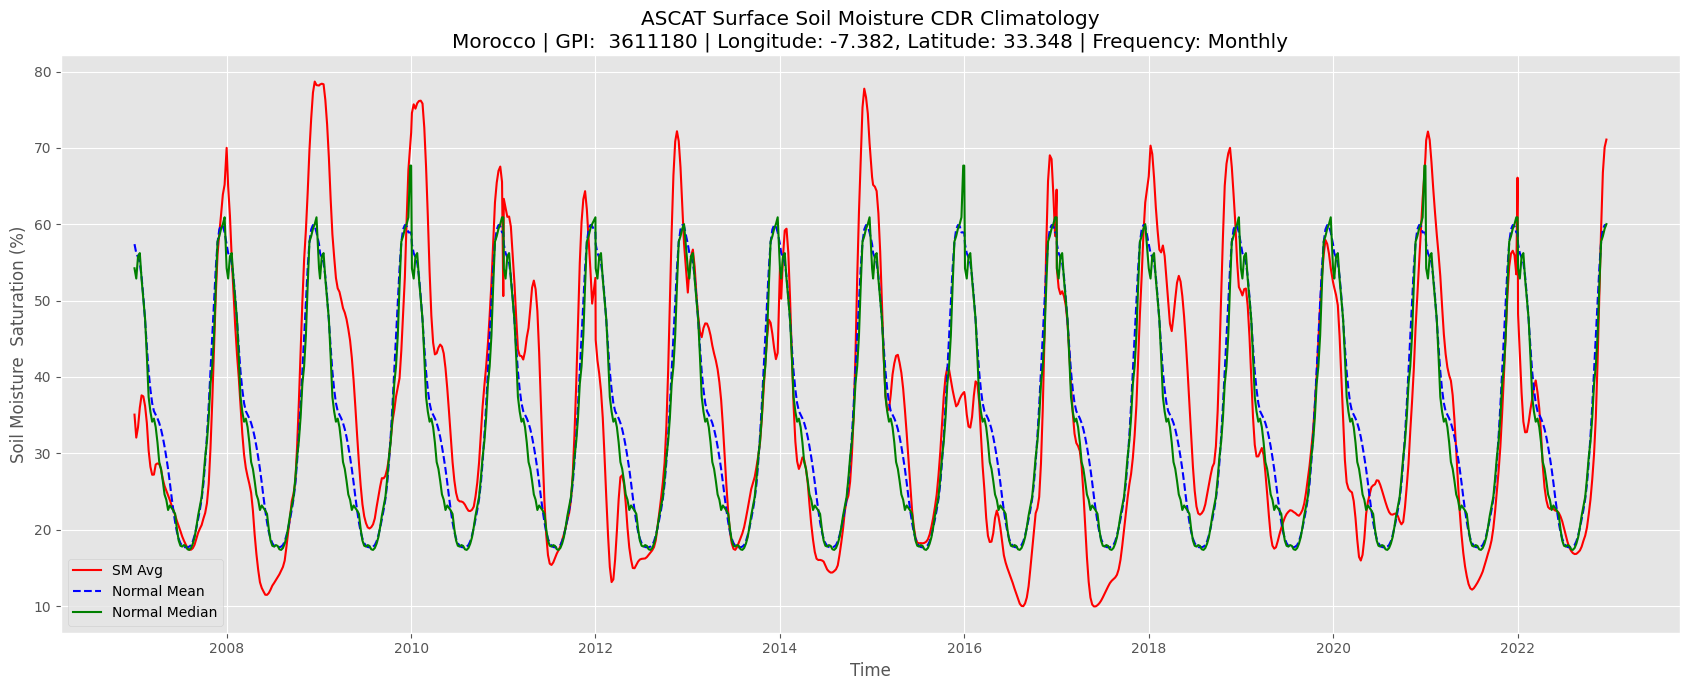

In [37]:
# Set the plot options for each column
colms = {"sm-mean":{"color":"red", "linestyle":"-", "linewidth":1.5 , "label":"SM Avg"},
         "norm-mean":{"color":"blue", "linestyle":"--", "linewidth":1.5 , "label":"Normal Mean"},
         "norm-median":{"color":"green", "linewidth":1.5 , "label":"Normal Median"},
         
        }

clim.plot_ts(colmns_kwargs=colms,
             title=f"ASCAT Surface Soil Moisture CDR Climatology\nMorocco | GPI:  {gpid} | Longitude: {lon}, Latitude: {lat} | Frequency: Monthly",
             figsize = (17,7),
             xlabel="Time",
             ylabel="Soil Moisture  Saturation (%)" , 
             legend=True,
             grid=True,)



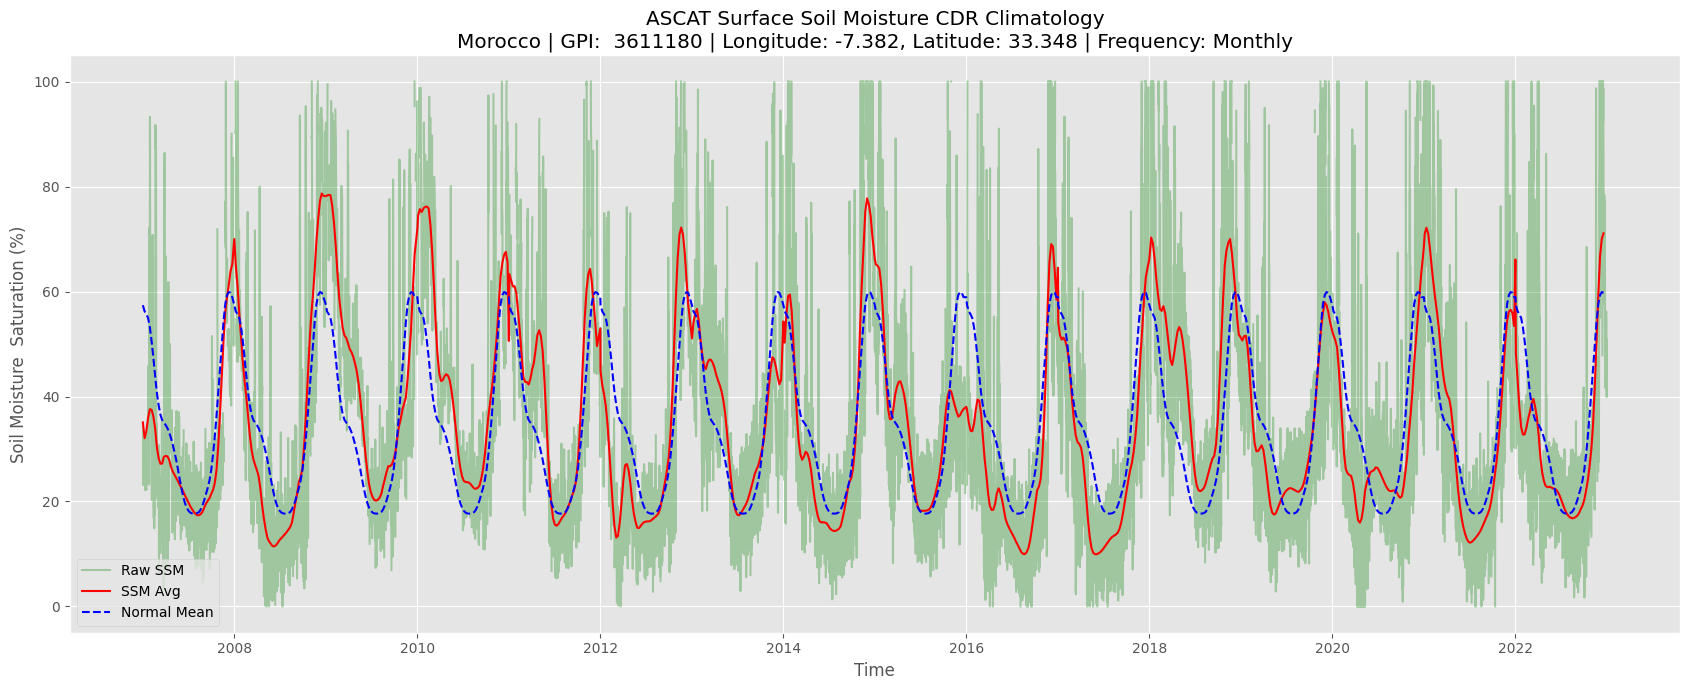

In [38]:
# Set the plot options for each metric
colms = {"sm-mean":{"color":"red", "linestyle":"-", "linewidth":1.5 , "label":"SSM Avg"},
         "norm-mean":{"color":"blue", "linestyle":"--", "linewidth":1.5 , "label":"Normal Mean"},
         
        }

# To plot the raw data, set plot_raw=True and provide the raw_kwargs for customization
clim.plot_ts(colmns_kwargs=colms,
             title=f"ASCAT Surface Soil Moisture CDR Climatology\nMorocco | GPI:  {gpid} | Longitude: {lon}, Latitude: {lat} | Frequency: Monthly",
             figsize = (17,7),
             xlabel="Time",
             ylabel="Soil Moisture  Saturation (%)" , 
             plot_raw=True,
             raw_kwargs={"color":"green","label":"Raw SSM" , "alpha":0.3},
             raw_resample=None, # Resample the raw data to the specified frequency. Set to None to disable resampling or provide a frequency string (e.g., "1D")
             legend=True,
             grid=True)